In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
training = pd.read_csv("../Zillow/train_2016_v2.csv")
features = pd.read_csv("../Zillow/properties_2016.csv")

/home/dan/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
training_data = training
features_data = features

training_data['transactiondate'] = pd.to_datetime(training_data['transactiondate'], errors='coerce')
training_data['transaction_month'] = training_data['transactiondate'].dt.month

In [4]:
training_data.head()

,parcelid,logerror,transactiondate,transaction_month
0,11016594,0.0276,2016-01-01,1
1,14366692,-0.1684,2016-01-01,1
2,12098116,-0.0040,2016-01-01,1
3,12643413,0.0218,2016-01-02,1
4,14432541,-0.0050,2016-01-02,1


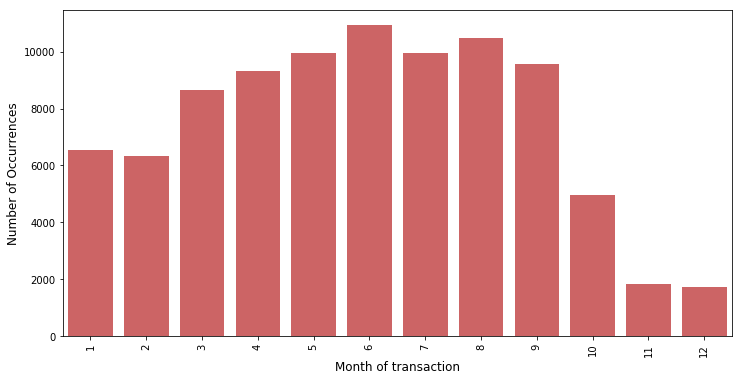

In [5]:
cnt_srs = training_data['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [6]:
features_data.shape

(2985217, 58)

/home/dan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


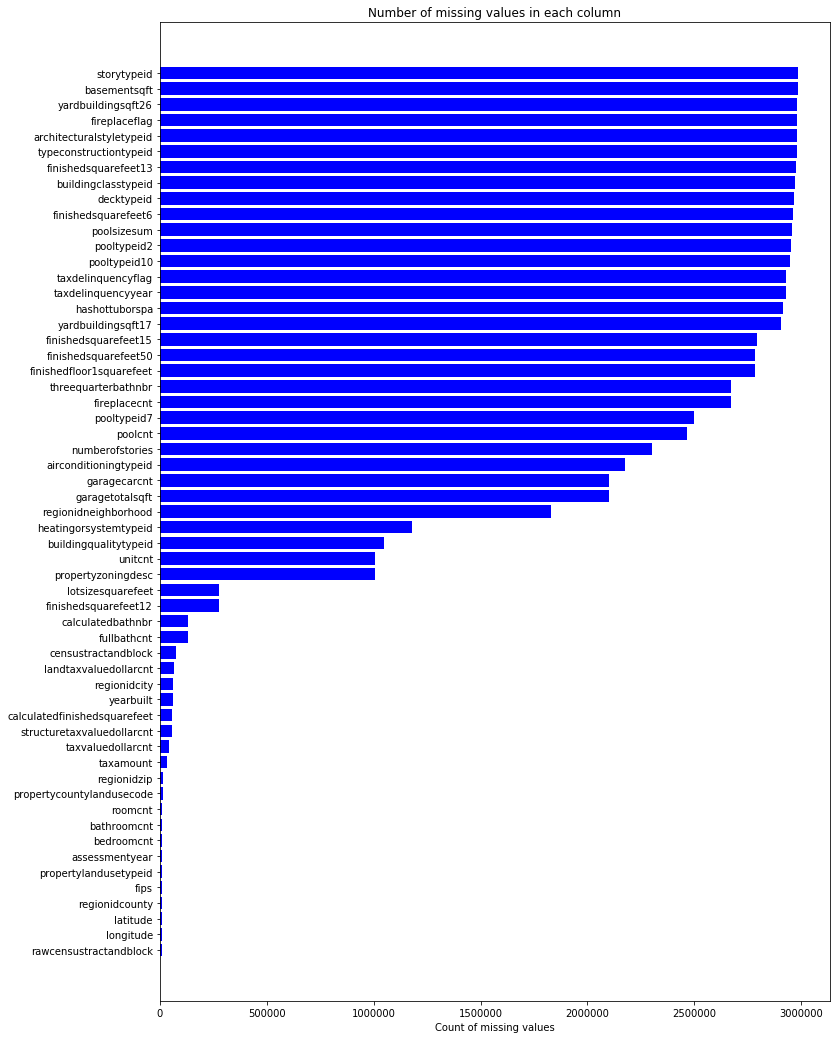

In [7]:
missing_df = features_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

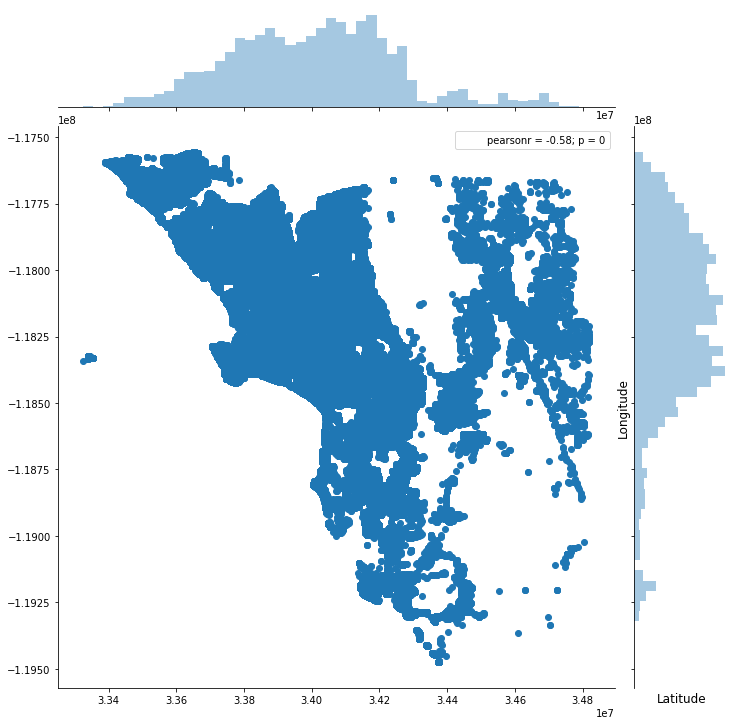

In [8]:
plt.figure(figsize=(12,12))
sns.jointplot(x=features_data.latitude.values, y=features_data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [9]:
full_training_features = pd.merge(training_data, features_data, on="parcelid", how="left")

In [14]:
full_training_features.shape

(90275, 61)